In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/Dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Room Area (sq. ft.),Number of Appliances,Outside Temperature (C),Insulation Thickness (inches),Building Type,HVAC System,Average Temperature in last 24 hours (C),Energy Consumption (kWh)
0,270,15,30,2.0,Residential,Central AC,28,380
1,273,20,28,1.5,Commercial,Split AC,26,420
2,276,18,26,1.8,Residential,Window AC,24,390
3,276,12,32,2.5,Residential,Central AC,32,320
4,276,22,20,1.2,Commercial,Split AC,18,480


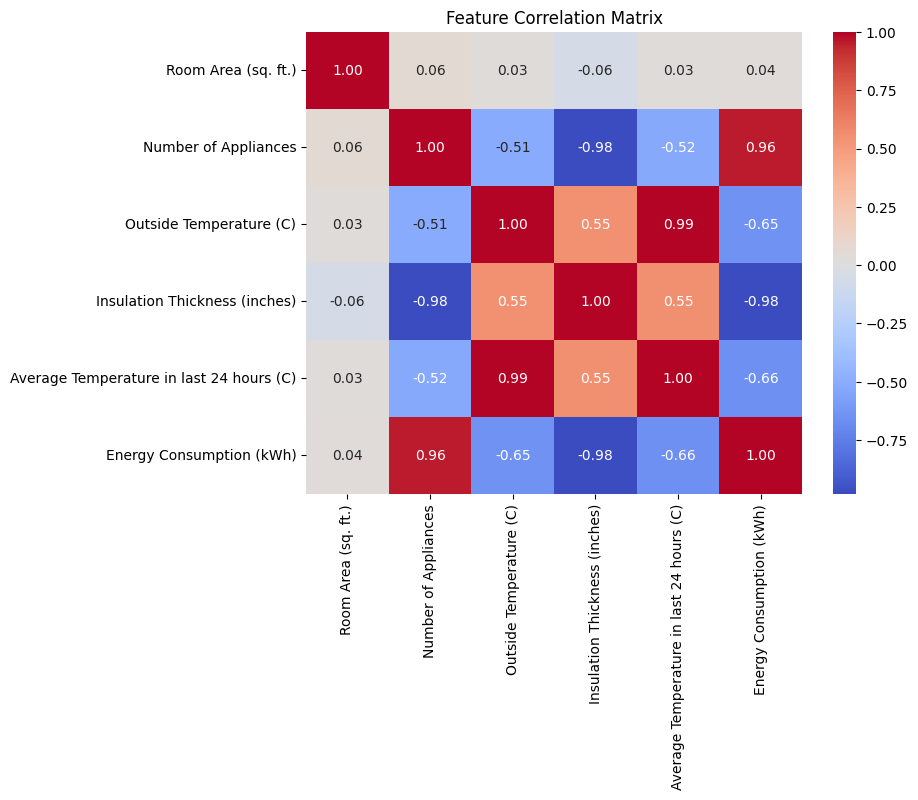

Primary feature influencing energy consumption: Number of Appliances
Secondary feature influencing energy consumption: Room Area (sq. ft.)
Least significant feature: Insulation Thickness (inches)


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Identify strongest and weakest correlations with 'Energy Consumption (kWh)'
correlations = correlation_matrix["Energy Consumption (kWh)"].drop("Energy Consumption (kWh)")
primary_feature = correlations.idxmax()
secondary_feature = correlations.nlargest(2).index[1]
least_significant_feature = correlations.idxmin()

print("Primary feature influencing energy consumption:", primary_feature)
print("Secondary feature influencing energy consumption:", secondary_feature)
print("Least significant feature:", least_significant_feature)


In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Convert categorical data into numerical using OneHotEncoding
categorical_features = ["Building Type", "HVAC System"]
encoder = OneHotEncoder(drop="first", sparse_output=False)  # Use 'sparse_output' instead of 'sparse'
encoded_cats = pd.DataFrame(encoder.fit_transform(df[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))

# Combine numeric and encoded categorical data
df_final = df.drop(columns=categorical_features).join(encoded_cats)

# Split data into features and target
X = df_final.drop(columns=["Energy Consumption (kWh)"])
y = df_final["Energy Consumption (kWh)"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [  -0.23683279   -2.17818088   -3.94367273 -129.54767779    2.78673666
   -1.9662246    -6.24948567   -0.77268903]
Model Intercept: 771.4664241730218


In [5]:
# Ensure column names in points match the training data
points = pd.DataFrame({
    "Room Area (sq. ft.)": [279, 277, 276],
    "Number of Appliances": [16, 22, 14],
    "Outside Temperature (C)": [20, 15, 25],  # Changed to match training feature name
    "Insulation Thickness (inches)": [1.7, 1.5, 2.2],
    "Average Temperature in last 24 hours (C)": [19, 14, 26],  # Changed to match training feature name
    "Building Type_ Residential": [1, 0, 1],  # Changed to match training encoding
    "HVAC System_ Split AC": [0, 1, 0],  # Ensure encoding is consistent
    "HVAC System_ Window AC": [0, 0, 1]   # Ensure encoding is consistent
})

# Predict energy consumption
y_pred = model.predict(points)

# Display predictions
for i, val in enumerate(y_pred):
    print(f"Predicted Energy Consumption for Point {i+1}: {val:.2f} kWh")


Predicted Energy Consumption for Point 1: 422.42 kWh
Predicted Energy Consumption for Point 2: 437.23 kWh
Predicted Energy Consumption for Point 3: 361.73 kWh


In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Ground truth values
y_true = np.array([385, 425, 350])

# Compute MSE
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 562.3670124750033


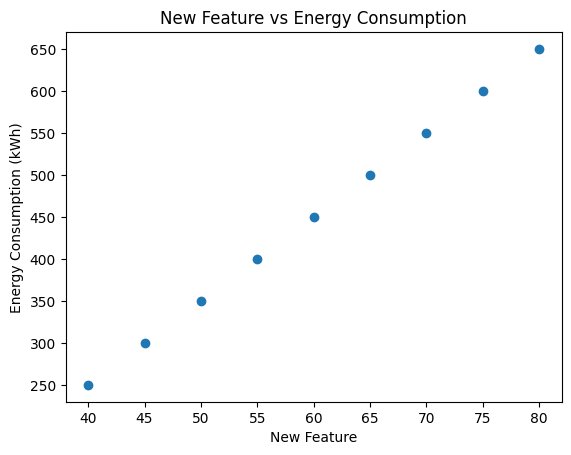

The new feature has a strong correlation and should be included in the model.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for new feature
new_feature = np.array([40, 45, 50, 55, 60, 65, 70, 75, 80])
energy_consumption = np.array([250, 300, 350, 400, 450, 500, 550, 600, 650])  # Corrected length

# Scatter plot analysis
plt.scatter(new_feature, energy_consumption)
plt.xlabel("New Feature")
plt.ylabel("Energy Consumption (kWh)")
plt.title("New Feature vs Energy Consumption")
plt.show()

# Decision
correlation = np.corrcoef(new_feature, energy_consumption)[0, 1]
if abs(correlation) > 0.5:
    print("The new feature has a strong correlation and should be included in the model.")
else:
    print("The new feature does not have a significant impact and can be excluded.")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Given dataset for classification
data = np.array([
    [8.27, 5.59, 1], [1.58, 5.87, 0], [5.92, 5.87, 0], [9.44, 5.83, 1],
    [2.11, 5.57, 0], [4.71, 5.94, 1], [3.82, 5.84, 1], [6.98, 5.91, 0],
    [3.15, 5.42, 0], [8.9, 5.94, 0], [7.65, 5.77, 1], [9.83, 5.29, 0],
    [1.94, 5.36, 1], [7.13, 5.28, 0], [5.77, 5.47, 0], [4.36, 5.31, 1],
    [5.09, 5.65, 0], [3.42, 5.24, 1], [2.76, 5.71, 1], [9.6, 5.52, 0]
])

# Extract features and labels
X_knn = data[:, :-1]
y_knn = data[:, -1]

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_knn, y_knn)

# Predict labels for given points
points_knn = np.array([[7.81, 5.33], [9.43, 5.29]])
predictions = knn.predict(points_knn)

# Display predictions
for i, pred in enumerate(predictions):
    print(f"Point {i+1} classified as: {'+' if pred == 1 else '-'}")

# Get nearest neighbors
neighbors1 = knn.kneighbors([points_knn[0]], n_neighbors=3, return_distance=False)
neighbors2 = knn.kneighbors([points_knn[1]], n_neighbors=3, return_distance=False)

print("Indexes of nearest neighbors for Point 1:", neighbors1)
print("Indexes of nearest neighbors for Point 2:", neighbors2)


Point 1 classified as: +
Point 2 classified as: -
Indexes of nearest neighbors for Point 1: [[10  0 13]]
Indexes of nearest neighbors for Point 2: [[19 11  3]]


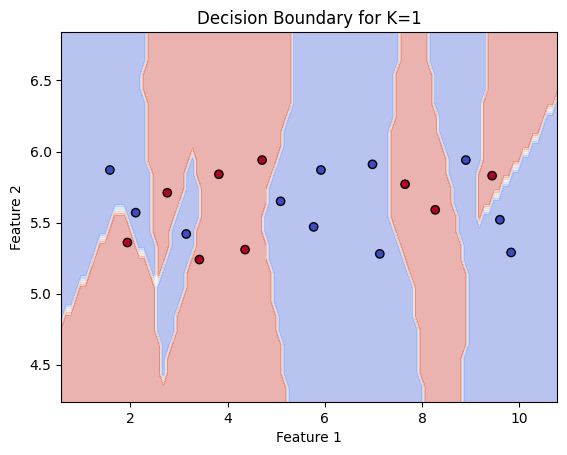

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Given dataset for classification (2D features, 1D labels)
data = np.array([
    [8.27, 5.59, 1], [1.58, 5.87, 0], [5.92, 5.87, 0], [9.44, 5.83, 1],
    [2.11, 5.57, 0], [4.71, 5.94, 1], [3.82, 5.84, 1], [6.98, 5.91, 0],
    [3.15, 5.42, 0], [8.9, 5.94, 0], [7.65, 5.77, 1], [9.83, 5.29, 0],
    [1.94, 5.36, 1], [7.13, 5.28, 0], [5.77, 5.47, 0], [4.36, 5.31, 1],
    [5.09, 5.65, 0], [3.42, 5.24, 1], [2.76, 5.71, 1], [9.6, 5.52, 0]
])

# Extract features and labels
X = data[:, :-1]
y = data[:, -1]

# Train KNN classifier with K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

# Create meshgrid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on the meshgrid points to create the decision boundary
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for K=1')
plt.show()


In [11]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Given dataset for classification with 2 features and class labels
data = np.array([
    [8.27, 5.59, 1],  # Data point 1 with class 1 (yellow circle)
    [1.58, 5.87, 0],  # Data point 2 with class 0 (blue square)
    [5.92, 5.87, 0],  # Data point 3 with class 0 (blue square)
    [9.44, 5.83, 1],  # Data point 4 with class 1 (yellow circle)
    [2.11, 5.57, 0],  # Data point 5 with class 0 (blue square)
    [4.71, 5.94, 1],  # Data point 6 with class 1 (yellow circle)
    [3.82, 5.84, 1],  # Data point 7 with class 1 (yellow circle)
    [6.98, 5.91, 0],  # Data point 8 with class 0 (blue square)
    [3.15, 5.42, 0],  # Data point 9 with class 0 (blue square)
    [8.9, 5.94, 0],   # Data point 10 with class 0 (blue square)
    [7.65, 5.77, 1],  # Data point 11 with class 1 (yellow circle)
    [9.83, 5.29, 0],  # Data point 12 with class 0 (blue square)
    [1.94, 5.36, 1],  # Data point 13 with class 1 (yellow circle)
    [7.13, 5.28, 0],  # Data point 14 with class 0 (blue square)
    [5.77, 5.47, 0],  # Data point 15 with class 0 (blue square)
    [4.36, 5.31, 1],  # Data point 16 with class 1 (yellow circle)
    [5.09, 5.65, 0],  # Data point 17 with class 0 (blue square)
    [3.42, 5.24, 1],  # Data point 18 with class 1 (yellow circle)
    [2.76, 5.71, 1],  # Data point 19 with class 1 (yellow circle)
    [9.6, 5.52, 0]    # Data point 20 with class 0 (blue square)
])

# Extract features and labels
X_knn = data[:, :-1]  # All columns except the last one (features)
y_knn = data[:, -1]   # Last column (labels)

# Train KNN classifier with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_knn, y_knn)

# Points for classification (p1 and p2)
points_knn = np.array([[8, 6], [8, 4]])

# Predict labels for the given points
predictions = knn.predict(points_knn)

# Display predictions
for i, pred in enumerate(predictions):
    print(f"Point {i+1} classified as: {'+' if pred == 1 else '-'}")

# Get nearest neighbors and their labels for each test point (p1 and p2)
neighbors1 = knn.kneighbors([points_knn[0]], n_neighbors=3, return_distance=False)
neighbors2 = knn.kneighbors([points_knn[1]], n_neighbors=3, return_distance=False)

# Print out the indexes and the labels of the nearest neighbors for each point
print("\nIndexes and labels of nearest neighbors for Point 1:")
for idx in neighbors1[0]:
    print(f"Index: {idx}, Label: {'+' if y_knn[idx] == 1 else '-'}")

print("\nIndexes and labels of nearest neighbors for Point 2:")
for idx in neighbors2[0]:
    print(f"Index: {idx}, Label: {'+' if y_knn[idx] == 1 else '-'}")


Point 1 classified as: +
Point 2 classified as: +

Indexes and labels of nearest neighbors for Point 1:
Index: 10, Label: +
Index: 0, Label: +
Index: 9, Label: -

Indexes and labels of nearest neighbors for Point 2:
Index: 13, Label: -
Index: 0, Label: +
Index: 10, Label: +


In [13]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Example dataset: 2D data points with labels (+ or -)
# Format: [feature1, feature2, label]
data = np.array([
    [1, 2, 1],  # Positive class (+)
    [2, 3, 0],  # Negative class (-)
    [3, 4, 1],  # Positive class (+)
    [5, 5, 0],  # Negative class (-)
    [7, 8, 1],  # Positive class (+)
    [8, 9, 0],  # Negative class (-)
    [10, 10, 1], # Positive class (+)
])

# Features and labels
X_train = data[:, :-1]  # Extracting the feature columns
y_train = data[:, -1]   # Extracting the label column (+: 1, -: 0)

# Create KNN model with K=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X_train, y_train)

# Define the test points to predict labels
test_points = np.array([[6, 6], [8, 8]])  # Points to classify

# Predict the labels for the test points
predictions = knn.predict(test_points)

# Convert predictions to (+) or (-) format
predicted_labels = ['+' if label == 1 else '-' for label in predictions]

# Print out the predictions for the test points
for i, label in enumerate(predicted_labels):
    print(f"Point {test_points[i]} classified as: {label}")

# Additional: Display the indices of nearest neighbors for each test point
for i, point in enumerate(test_points):
    neighbors = knn.kneighbors([point], n_neighbors=3, return_distance=False)
    print(f"\nFor Point {point}, nearest neighbors are:")
    for idx in neighbors[0]:
        print(f" - Index: {idx}, Label: {'+' if y_train[idx] == 1 else '-'}")


Point [6 6] classified as: +
Point [8 8] classified as: +

For Point [6 6], nearest neighbors are:
 - Index: 3, Label: -
 - Index: 4, Label: +
 - Index: 2, Label: +

For Point [8 8], nearest neighbors are:
 - Index: 4, Label: +
 - Index: 5, Label: -
 - Index: 6, Label: +


In [14]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Example dataset: 2D data points with labels (+ or -)
# Format: [feature1, feature2, label]
data = np.array([
    [1, 2, 1],  # Positive class (+)
    [2, 3, 0],  # Negative class (-)
    [3, 4, 1],  # Positive class (+)
    [5, 5, 0],  # Negative class (-)
    [7, 8, 1],  # Positive class (+)
    [8, 9, 0],  # Negative class (-)
    [10, 10, 1], # Positive class (+)
])

# Features and labels
X_train = data[:, :-1]  # Extracting the feature columns
y_train = data[:, -1]   # Extracting the label column (+: 1, -: 0)

# Create KNN model with K=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X_train, y_train)

# Define the test points to find the closest neighbors
test_points = np.array([[6, 6], [8, 8]])  # Points to check

# Get the indices of the nearest neighbors for each test point
nearest_neighbors = knn.kneighbors(test_points, n_neighbors=3, return_distance=False)

# Display the indices of the nearest neighbors
for i, point in enumerate(test_points):
    print(f"For Point {point}, the indices of the closest neighbors are: {nearest_neighbors[i]}")


For Point [6 6], the indices of the closest neighbors are: [3 4 2]
For Point [8 8], the indices of the closest neighbors are: [4 5 6]
